## Basic Example

In [21]:
import pandas as pd
from neuralprophet import NeuralProphet
from neuralprophet import set_random_seed 

set_random_seed(0)
data = pd.read_csv('./data/seattleWeather_1948-2017.csv')
data.head(10)

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
5,1948-01-06,0.44,48,39,True
6,1948-01-07,0.41,50,40,True
7,1948-01-08,0.04,48,35,True
8,1948-01-09,0.12,50,31,True
9,1948-01-10,0.74,43,34,True


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [23]:
prcp_data = data.rename(columns={'DATE': 'ds', 'PRCP': 'y'})[['ds', 'y']]
prcp_data.head(10)

,ds,y
0,1948-01-01,0.47
1,1948-01-02,0.59
2,1948-01-03,0.42
3,1948-01-04,0.31
4,1948-01-05,0.17
5,1948-01-06,0.44
6,1948-01-07,0.41
7,1948-01-08,0.04
8,1948-01-09,0.12
9,1948-01-10,0.74


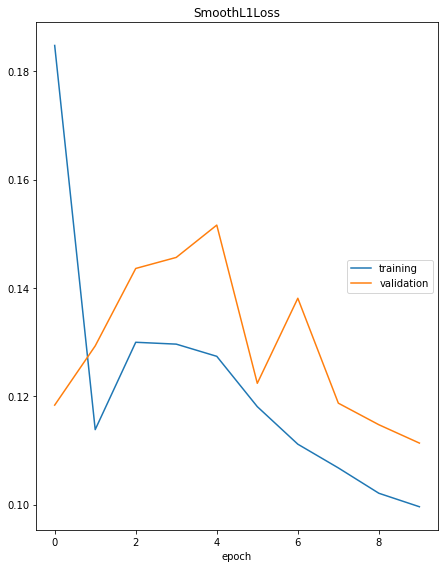

Epoch[10/10]: 100%|██████████| 10/10 [00:10<00:00,  1.04s/it, SmoothL1Loss=0.0996, MAE=0.124, RegLoss=0, MAE_val=0.132, SmoothL1Loss_val=0.111]


In [24]:
import time
time.sleep(20)
model = NeuralProphet()
metrics = model.fit(prcp_data, validate_each_epoch=True, 
                    valid_p=0.2, freq='D', 
                    plot_live_loss=True, epochs=10)

WARNING - (py.warnings._showwarnmsg) - /Users/amol/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



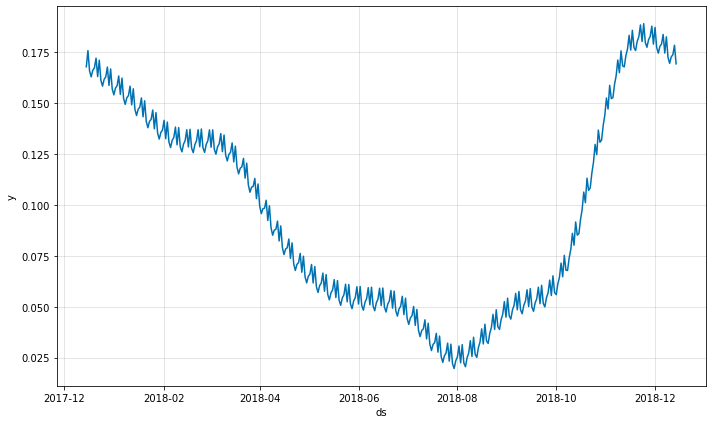

In [25]:
future = model.make_future_dataframe(prcp_data, periods=365)
forecast = model.predict(future)
forecasts_plot = model.plot(forecast)

WARNING - (py.warnings._showwarnmsg) - /Users/amol/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



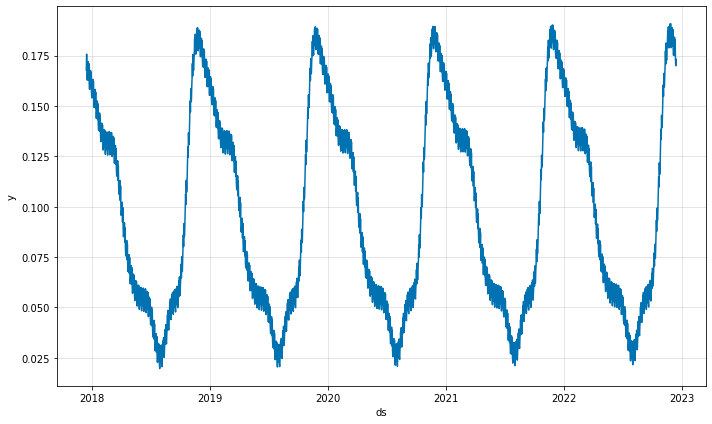

In [26]:
future = model.make_future_dataframe(prcp_data, periods=365*5)
forecast = model.predict(future)
forecasts_plot = model.plot(forecast)

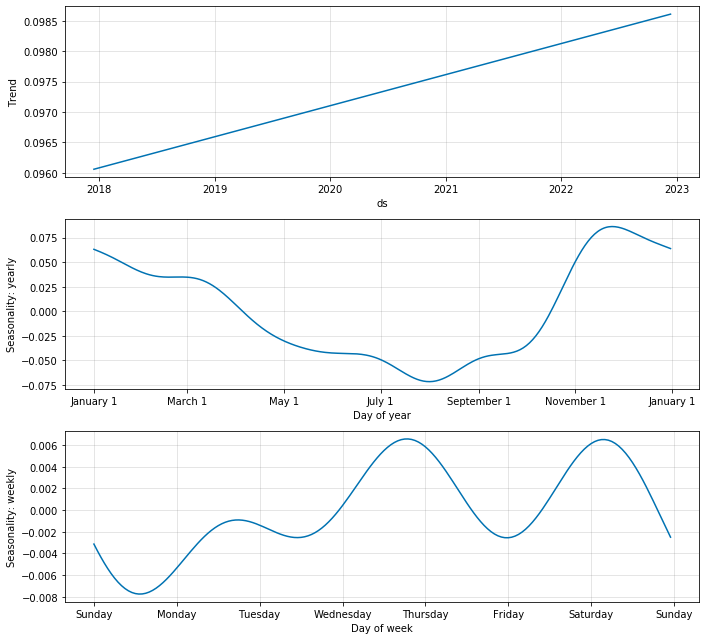

In [27]:
fig_comp = model.plot_components(forecast)

## Trend

Text(0.5, 1.0, 'S&P 500 Prices')

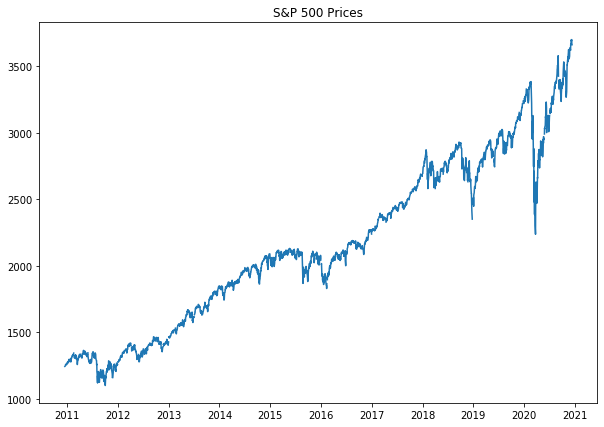

In [28]:
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

start = datetime(2010, 12, 13)
end = datetime(2020, 12, 11)
sp500_data = pdr.get_data_fred('sp500', start, end)
plt.figure(figsize=(10, 7))
plt.plot(sp500_data)
plt.title('S&P 500 Prices')

In [29]:
sp500_data = sp500_data.reset_index().rename(columns={'DATE': 'ds', 'sp500': 'y'})
sp500_data.head(10)

,ds,y
0,2010-12-16,1242.87
1,2010-12-17,1243.91
2,2010-12-20,1247.08
3,2010-12-21,1254.60
4,2010-12-22,1258.84
5,2010-12-23,1256.77
6,2010-12-24,NaN
7,2010-12-27,1257.54
8,2010-12-28,1258.51
9,2010-12-29,1259.78


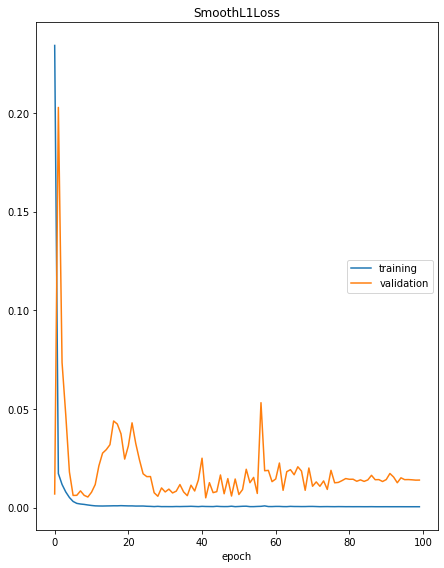

Epoch[100/100]: 100%|██████████| 100/100 [00:13<00:00,  7.23it/s, SmoothL1Loss=0.000434, MAE=41.2, RegLoss=0.000595, MAE_val=269, SmoothL1Loss_val=0.0139]


In [30]:
model = NeuralProphet(n_changepoints=100,
                      trend_reg=0.05,
                      yearly_seasonality=False,
                      weekly_seasonality=False,
                      daily_seasonality=False)

metrics = model.fit(sp500_data, validate_each_epoch=True, 
                    valid_p=0.2, freq='D', 
                    plot_live_loss=True, 
                    epochs=100)

In [31]:
def plot_forecast(model, data, periods, historic_pred=True, highlight_steps_ahead=None):
    
    future = model.make_future_dataframe(data, 
                                         periods=periods, 
                                         n_historic_predictions=historic_pred)
    forecast = model.predict(future)
    
    if highlight_steps_ahead is not None:
        model = model.highlight_nth_step_ahead_of_each_forecast(highlight_steps_ahead)
        model.plot_last_forecast(forecast)
    else:    
        model.plot(forecast)

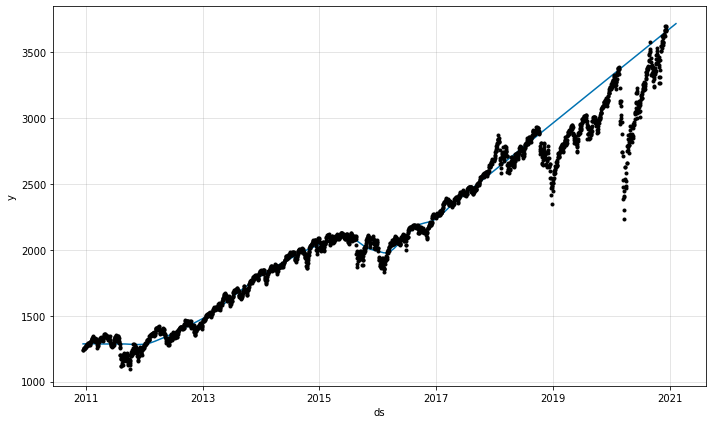

In [32]:
plot_forecast(model, sp500_data, periods=60)

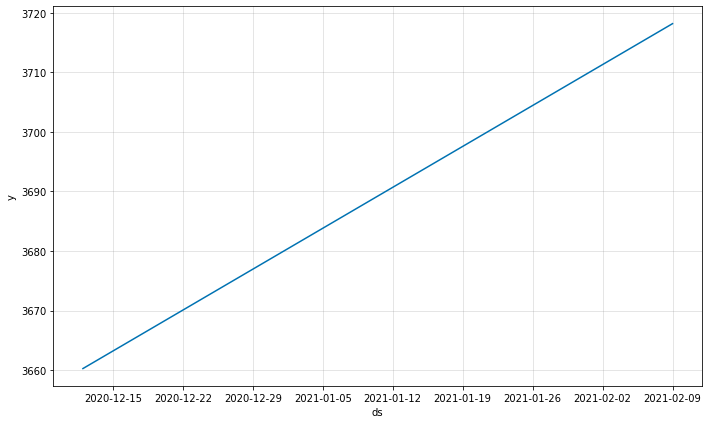

In [33]:
plot_forecast(model, sp500_data, periods=60, historic_predictions=False)

## Seasonality

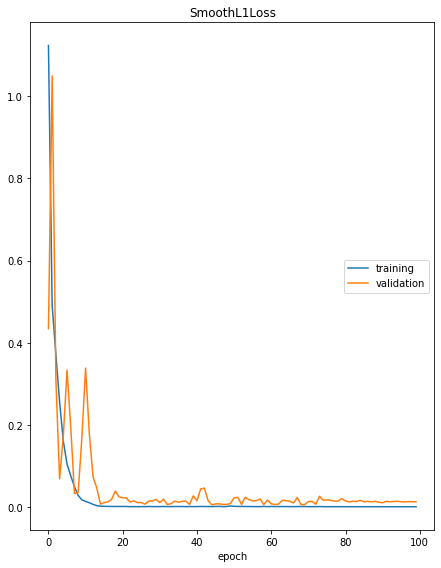

Epoch[100/100]: 100%|██████████| 100/100 [00:15<00:00,  6.44it/s, SmoothL1Loss=0.00044, MAE=42.6, RegLoss=0.0021, MAE_val=247, SmoothL1Loss_val=0.0127]


In [34]:
model = NeuralProphet(n_changepoints=100,
                      trend_reg=0.5,
                      yearly_seasonality=True,
                      weekly_seasonality=False,
                      daily_seasonality=False)

metrics = model.fit(sp500_data, validate_each_epoch=True, 
                    valid_p=0.2, freq='D', 
                    plot_live_loss=True, 
                    epochs=100)

WARNING - (py.warnings._showwarnmsg) - /Users/amol/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



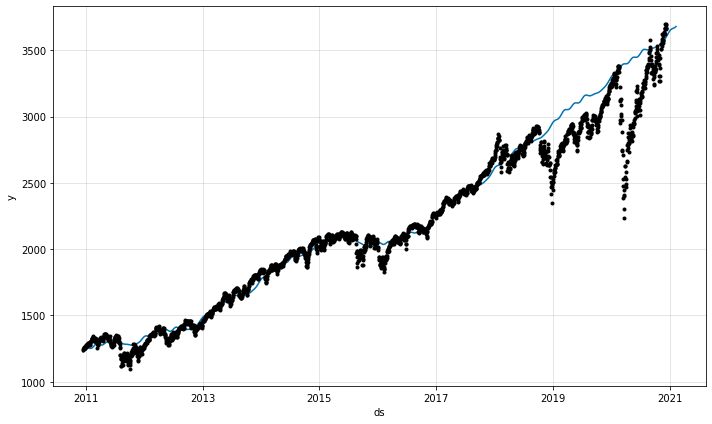

In [35]:
plot_forecast(model, sp500_data, periods=60, historic_predictions=True)

WARNING - (py.warnings._showwarnmsg) - /Users/amol/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



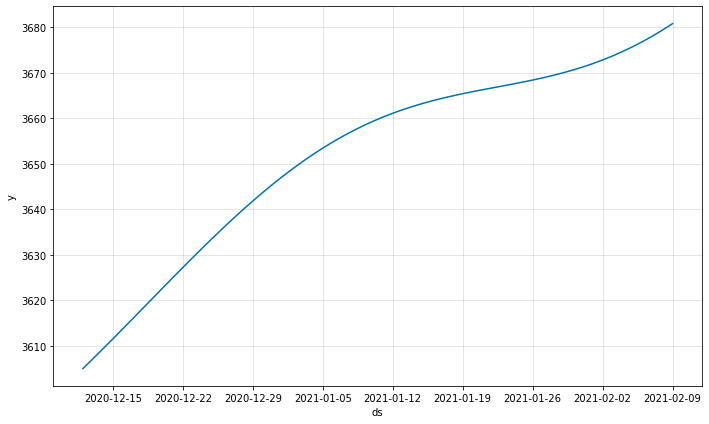

In [16]:
plot_forecast(model, sp500_data, periods=60, historic_predictions=False)

## Using AR-Net

In [17]:
model = NeuralProphet(
    n_forecasts=60,
    n_lags=60,
    changepoints_range=0.95,
    n_changepoints=100,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    batch_size=64,
    epochs=100,
    learning_rate=1.0,
)

model.fit(sp500_data, 
          freq='D',
          valid_p=0.2,
          epochs=100)

INFO - (NP.forecaster._handle_missing_data) - 1042 missing dates added.
INFO - (NP.forecaster._handle_missing_data) - 1134 NaN values in column y were auto-imputed.
  0%|          | 0/100 [00:00<?, ?it/s]WARNING - (py.warnings._showwarnmsg) - /Users/amol/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

Epoch[100/100]: 100%|██████████| 100/100 [00:43<00:00,  2.29it/s, SmoothL1Loss=0.000458, MAE=46.2, RegLoss=0]


,SmoothL1Loss,MAE,RegLoss
0,0.160545,987.174305,0.0
1,0.011462,267.443764,0.0
2,0.002728,126.037381,0.0
3,0.001536,89.171200,0.0
4,0.001898,103.036601,0.0
...,...,...,...
95,0.000470,47.164191,0.0
96,0.000469,46.931481,0.0
97,0.000463,46.164468,0.0
98,0.000461,46.483650,0.0


INFO - (NP.forecaster._handle_missing_data) - 1042 missing dates added.
INFO - (NP.forecaster._handle_missing_data) - 1134 NaN values in column y were auto-imputed.
WARNING - (py.warnings._showwarnmsg) - /Users/amol/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



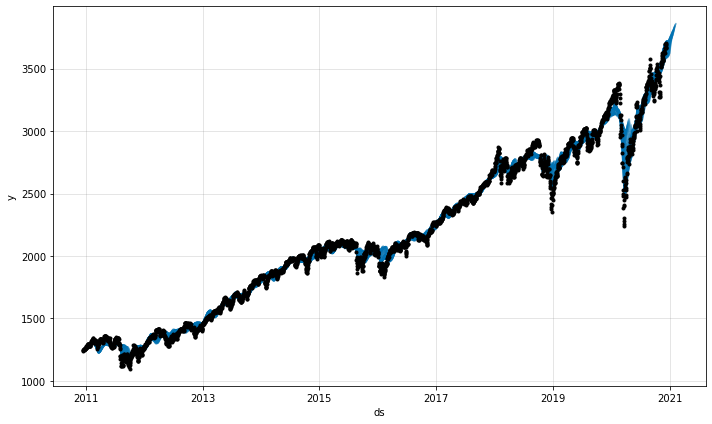

In [18]:
plot_forecast(model, sp500_data, periods=60, historic_predictions=True)

INFO - (NP.forecaster._handle_missing_data) - 22 missing dates added.
INFO - (NP.forecaster._handle_missing_data) - 23 NaN values in column y were auto-imputed.
WARNING - (py.warnings._showwarnmsg) - /Users/amol/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



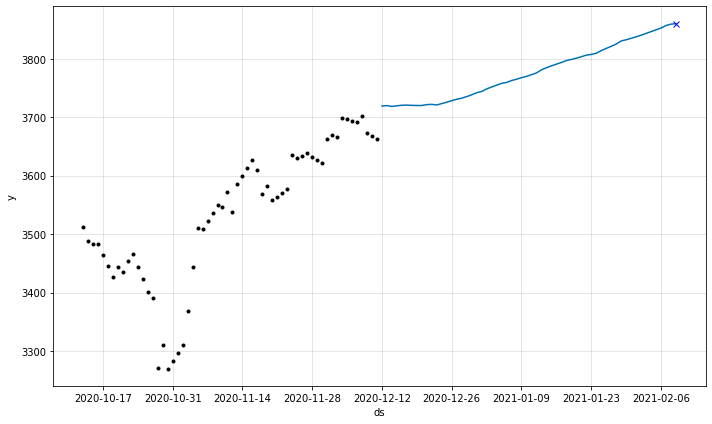

In [20]:
plot_forecast(model, sp500_data, periods=60, historic_predictions=False, highlight_steps_ahead=60)

## Events

In [37]:
model = NeuralProphet(
    n_forecasts=60,
    n_lags=60,
    changepoints_range=0.95,
    n_changepoints=100,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    batch_size=64,
    epochs=100,
    learning_rate=1.0,
)

model = model.add_country_holidays("US", mode="additive", lower_window=-1, upper_window=1)

model.fit(sp500_data, 
          freq='D',
          valid_p=0.2,
          epochs=100)

INFO - (NP.forecaster._handle_missing_data) - 1042 missing dates added.
INFO - (NP.forecaster._handle_missing_data) - 1134 NaN values in column y were auto-imputed.
  0%|          | 0/100 [00:00<?, ?it/s]WARNING - (py.warnings._showwarnmsg) - /Users/amol/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")

Epoch[100/100]: 100%|██████████| 100/100 [00:45<00:00,  2.20it/s, SmoothL1Loss=0.00045, MAE=46.1, RegLoss=0]


,SmoothL1Loss,MAE,RegLoss
0,0.136211,893.487955,0.0
1,0.008375,222.646929,0.0
2,0.001904,102.386915,0.0
3,0.001381,86.932175,0.0
4,0.001308,84.536588,0.0
...,...,...,...
95,0.000467,46.817997,0.0
96,0.000466,46.559467,0.0
97,0.000458,46.736510,0.0
98,0.000451,45.593150,0.0


INFO - (NP.forecaster._handle_missing_data) - 1042 missing dates added.
INFO - (NP.forecaster._handle_missing_data) - 1134 NaN values in column y were auto-imputed.
WARNING - (py.warnings._showwarnmsg) - /Users/amol/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



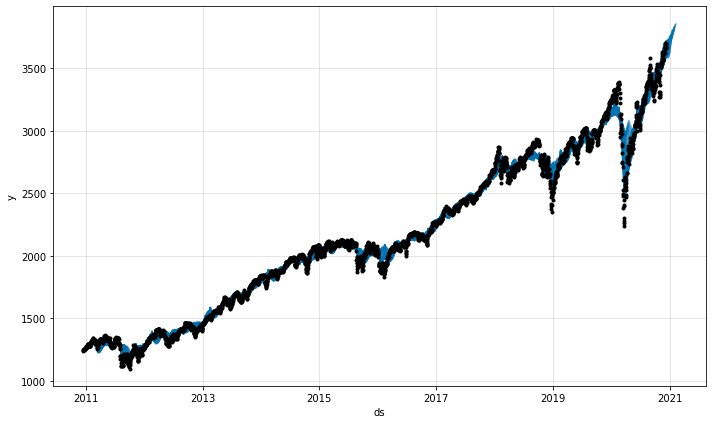

In [38]:
plot_forecast(model, sp500_data, periods=60, historic_predictions=True)

INFO - (NP.forecaster._handle_missing_data) - 22 missing dates added.
INFO - (NP.forecaster._handle_missing_data) - 23 NaN values in column y were auto-imputed.
WARNING - (py.warnings._showwarnmsg) - /Users/amol/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")



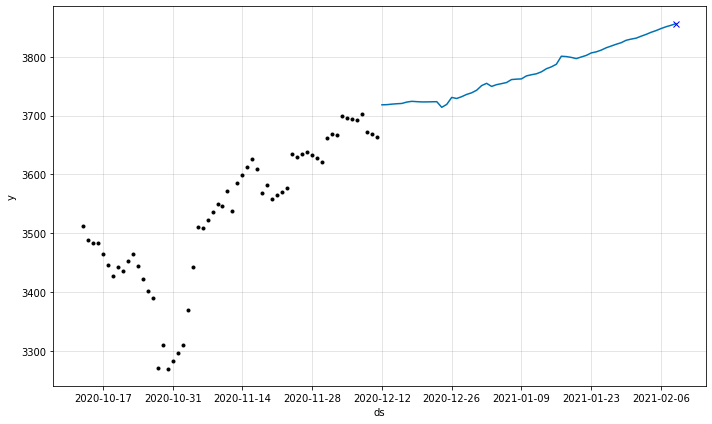

In [39]:
plot_forecast(model, sp500_data, periods=60, historic_predictions=False, highlight_steps_ahead=60)